In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('hotel_booking.csv')

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,01-07-2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,0,Check-Out,01-07-2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,02-07-2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,0,Check-Out,02-07-2015,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,0,1,Check-Out,03-07-2015,Linda Hines,LHines@verizon.com,713-226-5883,************5498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,06-09-2017,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,07-09-2017,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,07-09-2017,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,07-09-2017,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860


In [4]:
df.shape

(119390, 36)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],format='mixed')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df.drop(['company','agent','email','name','required_car_parking_spaces'],axis=1,inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status          

In [13]:
# to remove outliers

In [14]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.571683,2016-07-31 20:49:36.695991552
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,2016-02-03 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,2016-08-05 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,1.000000,2017-02-16 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,5.000000,2017-12-09 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.792678,NaN


In [15]:
df = df[df['adr']<5000]

In [16]:
# to check a uniqueness

In [17]:
df.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,phone-number,credit_card
count,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897,118897
unique,2,12,5,177,7,5,10,12,3,4,3,118897,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,669-792-1661,************3627
freq,79301,13852,91862,48585,56402,97729,85600,73862,104163,89173,74745,1,28


In [18]:
for col in df.describe(include='object'):
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' 'ROU' 'NOR' 'OMN' 'ARG' 'POL' 'DEU'
 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST' 'CZE'
 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR' 'UKR'
 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO' 'ISR'
 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM' 'HRV'
 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY' 'KWT'
 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN' 'SYC'
 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB' 'CMR'
 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'JOR' 

In [19]:
# Analysis and visualization

In [20]:
cancel_perc = df['is_canceled'].value_counts(normalize=True)      # here we use 'normalize=True' because it print value in percentage.

In [21]:
cancel_perc

is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64

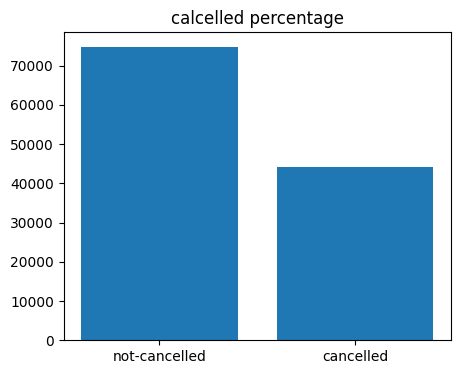

In [22]:
plt.figure(figsize=(5,4))
plt.title("calcelled percentage")
plt.bar(['not-cancelled','cancelled'],df['is_canceled'].value_counts())
plt.show()

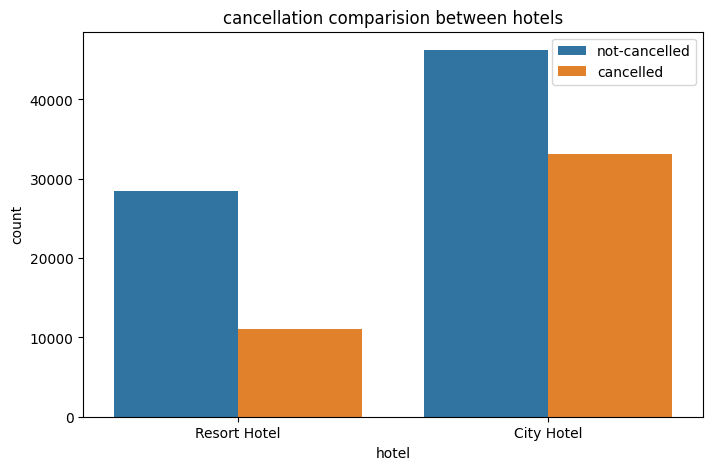

In [23]:
plt.figure(figsize=(8,5))
plt.title("cancellation comparision between hotels")
sns.countplot(x='hotel',hue='is_canceled',data=df)
plt.legend(['not-cancelled','cancelled'])
plt.show()

In [24]:
resort_hotel = df[df['hotel']=='Resort Hotel']               # to check cancell percentage of resort hotel only
resort_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.72025
1    0.27975
Name: proportion, dtype: float64

In [25]:
city_hotel = df[df['hotel']=='City Hotel']               # to check cancell percentage of city hotel only
city_hotel['is_canceled'].value_counts(normalize=True)

is_canceled
0    0.582918
1    0.417082
Name: proportion, dtype: float64

C:\Users\saura\AppData\Local\Temp\ipykernel_2248\1387652228.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['reservation_status_date'].dt.month


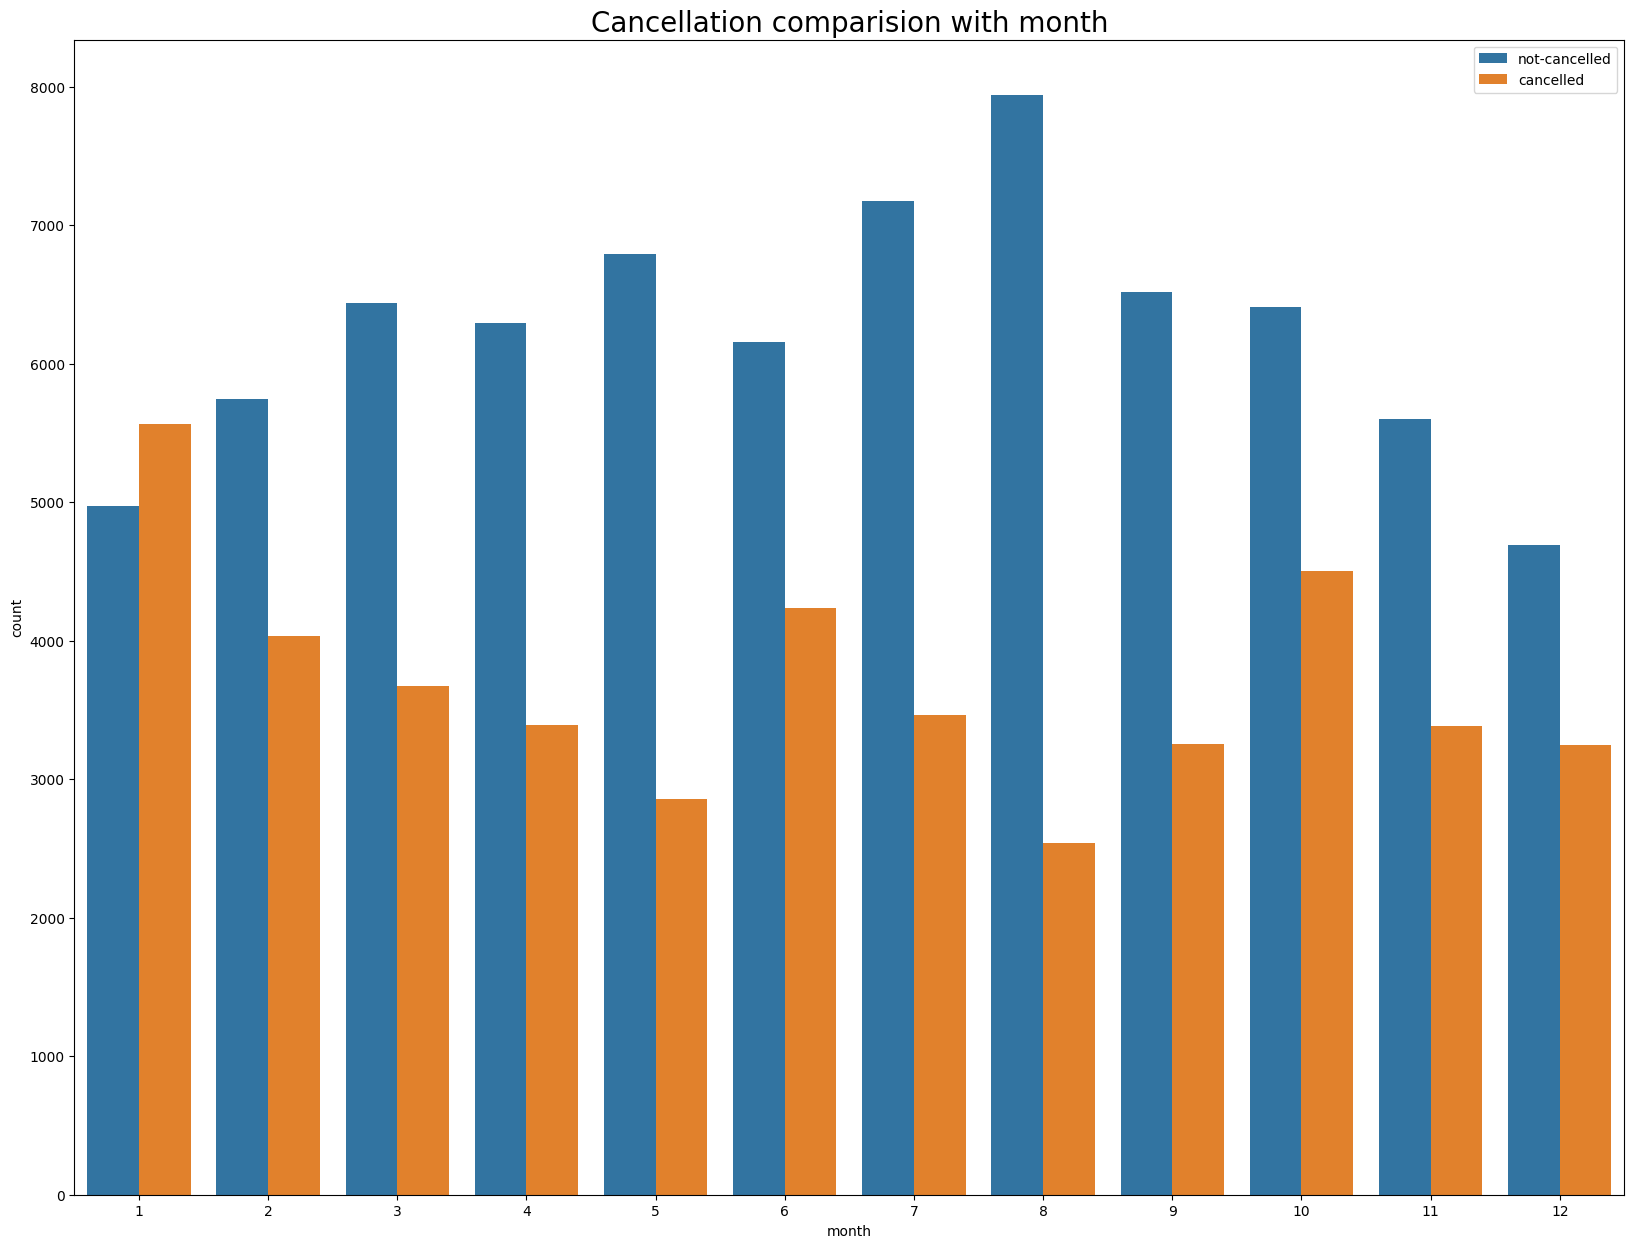

In [26]:
plt.figure(figsize=(20,15))
df['month'] = df['reservation_status_date'].dt.month
sns.countplot(x='month', hue='is_canceled', data=df)
plt.title('Cancellation comparision with month',size=20)
plt.legend(['not-cancelled','cancelled'])
plt.show()

In [27]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

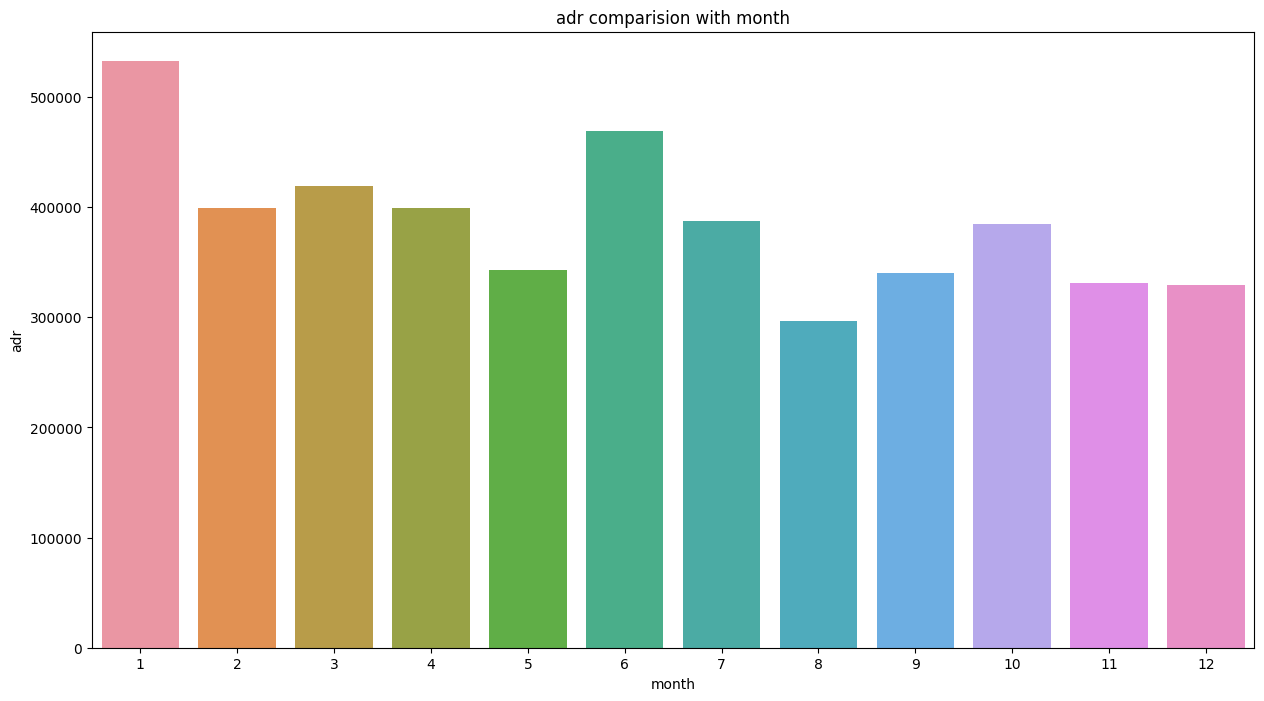

In [28]:
plt.figure(figsize=(15,8))
plt.title("adr comparision with month")
sns.barplot(x='month',y='adr', data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index() )
plt.show()

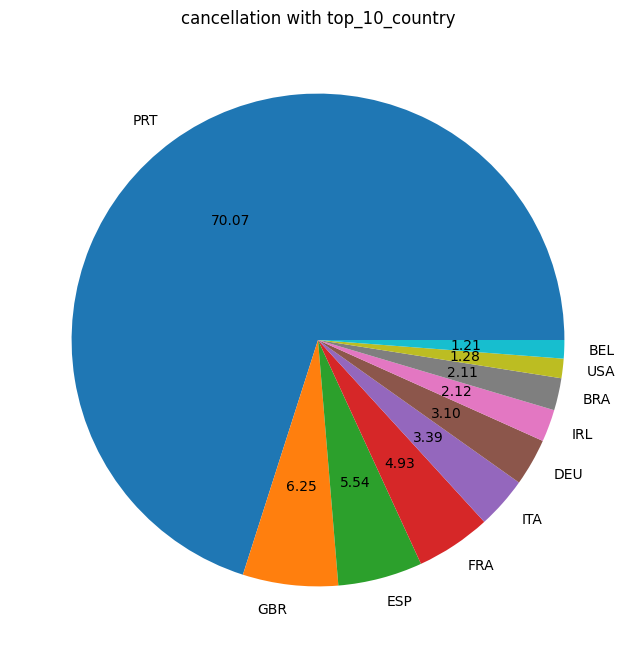

In [59]:
cancelled_data = df[df['is_canceled']==1]
plt.figure(figsize=(8,8))
plt.title("cancellation with top_10_country")
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index)
plt.show()

In [30]:
df['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [50]:
cnd_m = cancelled_data['market_segment'].value_counts(normalize=True)
cnd_m

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

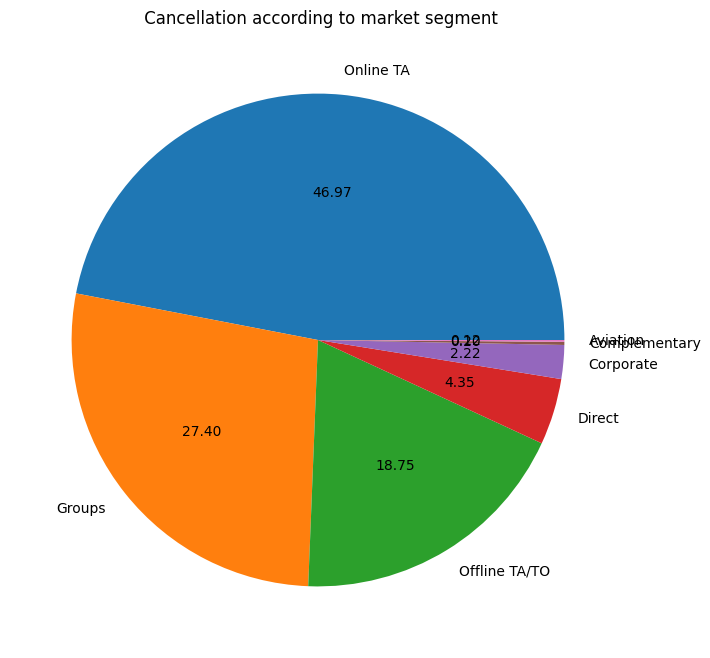

In [56]:
plt.figure(figsize=(8,8))
plt.title(" Cancellation according to market segment")
plt.pie(cnd_m,autopct='%.2f', labels=cnd_m.index)
plt.show()

In [32]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,phone-number,credit_card,month
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,Check-Out,2015-01-07,669-792-1661,************4322,1
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0,Transient,0.00,0,Check-Out,2015-01-07,858-637-6955,************9157,1
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,Check-Out,2015-02-07,652-885-2745,************3734,2
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,0,Transient,75.00,0,Check-Out,2015-02-07,364-656-8427,************5677,2
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,0,Transient,98.00,1,Check-Out,2015-03-07,713-226-5883,************5498,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,0,Transient,96.14,0,Check-Out,2017-06-09,403-092-5582,************8647,6
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,0,Transient,225.43,2,Check-Out,2017-07-09,238-763-0612,************4333,7
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,157.71,4,Check-Out,2017-07-09,395-518-4100,************1821,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,0,Transient,104.40,0,Check-Out,2017-07-09,531-528-1017,************7860,7


In [33]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date', 'phone-number', 'credit_card', 'month'],
      dtype='object')

In [34]:
df.loc[df['reserved_room_type']==df['assigned_room_type'],'room status' ] = 'desired'
df.loc[df['reserved_room_type']!=df['assigned_room_type'],'room status' ] = 'un-desired'

C:\Users\saura\AppData\Local\Temp\ipykernel_2248\534069900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['reserved_room_type']==df['assigned_room_type'],'room status' ] = 'desired'


In [35]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,phone-number,credit_card,month,room status
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,Check-Out,2015-01-07,669-792-1661,************4322,1,desired
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0,Transient,0.00,0,Check-Out,2015-01-07,858-637-6955,************9157,1,desired
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,Check-Out,2015-02-07,652-885-2745,************3734,2,un-desired
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,Transient,75.00,0,Check-Out,2015-02-07,364-656-8427,************5677,2,desired
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,Transient,98.00,1,Check-Out,2015-03-07,713-226-5883,************5498,3,desired
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,0,Transient,96.14,0,Check-Out,2017-06-09,403-092-5582,************8647,6,desired
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,0,Transient,225.43,2,Check-Out,2017-07-09,238-763-0612,************4333,7,desired
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,0,Transient,157.71,4,Check-Out,2017-07-09,395-518-4100,************1821,7,desired
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,0,Transient,104.40,0,Check-Out,2017-07-09,531-528-1017,************7860,7,desired


In [36]:
df['room status'].value_counts(normalize=True)

room status
desired       0.876372
un-desired    0.123628
Name: proportion, dtype: float64

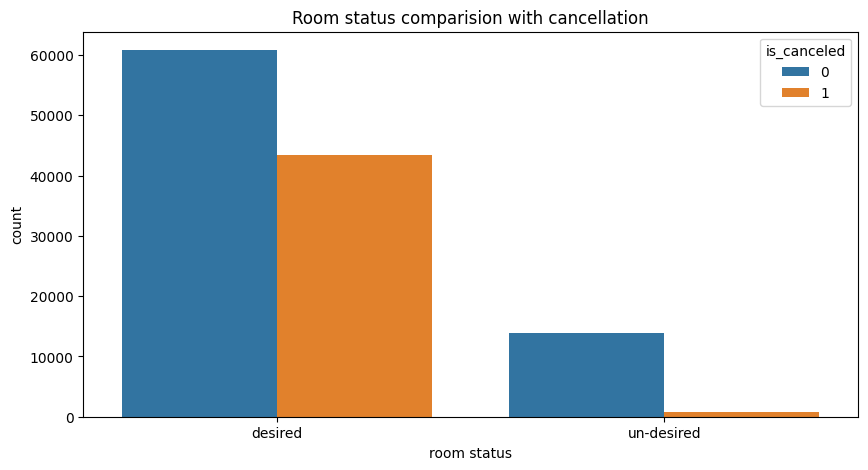

In [62]:
plt.figure(figsize=(10,5))
plt.title("Room status comparision with cancellation")
sns.countplot(x='room status',hue='is_canceled', data=df)
plt.show()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  float64     

In [39]:
df['children'] = df['children'].astype('int64')

C:\Users\saura\AppData\Local\Temp\ipykernel_2248\4137062616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['children'] = df['children'].astype('int64')


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118897 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           118897 non-null  object        
 1   is_canceled                     118897 non-null  int64         
 2   lead_time                       118897 non-null  int64         
 3   arrival_date_year               118897 non-null  int64         
 4   arrival_date_month              118897 non-null  object        
 5   arrival_date_week_number        118897 non-null  int64         
 6   arrival_date_day_of_month       118897 non-null  int64         
 7   stays_in_weekend_nights         118897 non-null  int64         
 8   stays_in_week_nights            118897 non-null  int64         
 9   adults                          118897 non-null  int64         
 10  children                        118897 non-null  int64       

In [41]:
df.loc[(df['adults']==2) & (df['children']==0),'people type' ]='couple'
df.loc[(df['adults']==1) & (df['children']==0),'people type' ]='single'

C:\Users\saura\AppData\Local\Temp\ipykernel_2248\1498695466.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[(df['adults']==2) & (df['children']==0),'people type' ]='couple'


In [42]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,phone-number,credit_card,month,room status,people type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,Check-Out,2015-01-07,669-792-1661,************4322,1,desired,couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,Check-Out,2015-01-07,858-637-6955,************9157,1,desired,couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,Check-Out,2015-02-07,652-885-2745,************3734,2,un-desired,single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,Check-Out,2015-02-07,364-656-8427,************5677,2,desired,single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,1,Check-Out,2015-03-07,713-226-5883,************5498,3,desired,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,Check-Out,2017-06-09,403-092-5582,************8647,6,desired,couple
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,2,Check-Out,2017-07-09,238-763-0612,************4333,7,desired,NaN
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,4,Check-Out,2017-07-09,395-518-4100,************1821,7,desired,couple
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,Check-Out,2017-07-09,531-528-1017,************7860,7,desired,couple


In [43]:
df['people type'].fillna('family',inplace=True)

C:\Users\saura\AppData\Local\Temp\ipykernel_2248\2128000269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['people type'].fillna('family',inplace=True)


In [44]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,total_of_special_requests,reservation_status,reservation_status_date,phone-number,credit_card,month,room status,people type
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.00,0,Check-Out,2015-01-07,669-792-1661,************4322,1,desired,couple
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.00,0,Check-Out,2015-01-07,858-637-6955,************9157,1,desired,couple
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.00,0,Check-Out,2015-02-07,652-885-2745,************3734,2,un-desired,single
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.00,0,Check-Out,2015-02-07,364-656-8427,************5677,2,desired,single
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.00,1,Check-Out,2015-03-07,713-226-5883,************5498,3,desired,couple
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,Check-Out,2017-06-09,403-092-5582,************8647,6,desired,couple
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,2,Check-Out,2017-07-09,238-763-0612,************4333,7,desired,family
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,4,Check-Out,2017-07-09,395-518-4100,************1821,7,desired,couple
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,Check-Out,2017-07-09,531-528-1017,************7860,7,desired,couple


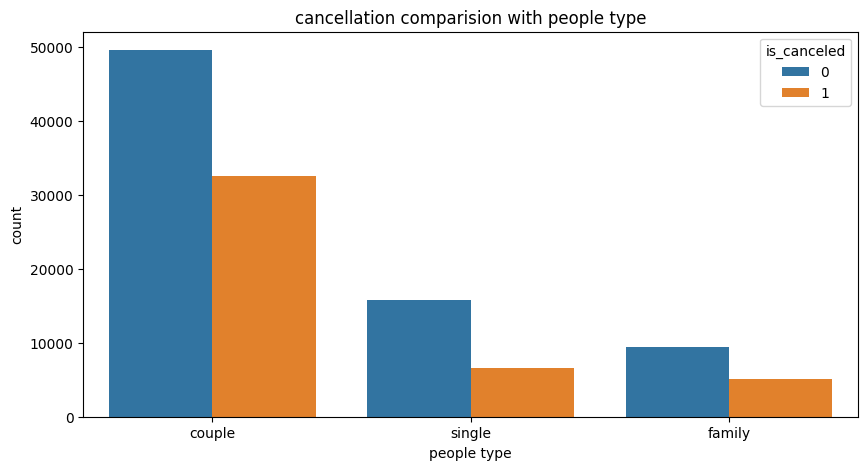

In [64]:
plt.figure(figsize=(10,5))
plt.title("cancellation comparision with people type")
sns.countplot(x='people type', hue='is_canceled',data=df)
plt.show()